# 读取AWX卫星数据文件

In [5]:
import numpy as np

In [2]:
fname = "./data/ANI_IR1_R04_20191026_2100_FY2G.AWX"

In [13]:
def read_awx_cloud(fname):
    """
    Read satellite awx format file.

    :param fname: file pathname.
    :return: data list
    """

    # read part of binary
    # refer to
    # https://stackoverflow.com/questions/14245094/how-to-read-part-of-binary-file-with-numpy

    # open file
    with open(fname, 'rb') as fh:
        # read file content
        ba = bytearray(fh.read())

        # define head structure
        head_dtype = [
            ('SAT96', 'S12'),    # SAT96 filename
            ('byteSequence', 'i2'),    # integer number byte sequence
            ('firstClassHeadLength', 'i2'),
            ('secondClassHeadLength', 'i2'),
            ('padDataLength', 'i2'),
            ('recordLength', 'i2'),
            ('headRecordNumber', 'i2'),
            ('dataRecordNumber', 'i2'),
            ('productCategory', 'i2'),
            ('compressMethod', 'i2'),
            ('formatString', 'S8'),
            ('qualityFlag', 'i2'),
            ('satelliteName', 'S8'),
            ('year', 'i2'), ('month', 'i2'),
            ('day', 'i2'), ('hour', 'i2'),
            ('minute', 'i2'),
            ('channel', 'i2'),
            ('flagOfProjection', 'i2'),
            ('widthOfImage', 'i2'),
            ('heightOfImage', 'i2'),
            ('scanLineNumberOfImageTopLeft', 'i2'),
            ('pixelNumberOfImageTopLeft', 'i2'),
            ('sampleRatio', 'i2'),
            ('latitudeOfNorth', 'i2'),
            ('latitudeOfSouth', 'i2'),
            ('longitudeOfWest', 'i2'),
            ('longitudeOfEast', 'i2'),
            ('centerLatitudeOfProjection', 'i2'),
            ('centerLongitudeOfProjection', 'i2'),
            ('standardLatitude1', 'i2'),
            ('standardLatitude2', 'i2'),
            ('horizontalResolution', 'i2'),
            ('verticalResolution', 'i2'),
            ('overlapFlagGeoGrid', 'i2'),
            ('overlapValueGeoGrid', 'i2'),
            ('dataLengthOfColorTable', 'i2'),
            ('dataLengthOfCalibration', 'i2'),
            ('dataLengthOfGeolocation', 'i2'),
            ('reserved', 'i2')]

        head_info = np.frombuffer(ba[0:104], dtype=head_dtype)
        ind = 104

        # head rest information
        head_rest_len = (head_info['recordLength'][0].astype(np.int) *
                        head_info['headRecordNumber'][0] - ind)
        head_rest = np.frombuffer(
            ba[ind:(ind + head_rest_len)],
            dtype='u1', count=head_rest_len)
        ind += head_rest_len

        # retrieve data records
        data_len = (head_info['dataRecordNumber'][0].astype(np.int) *
                    head_info['recordLength'][0])
        data = np.frombuffer(
            ba[ind:(ind + data_len)], dtype='u1',
            count=data_len)
        data.shape = (head_info['dataRecordNumber'][0],
                    head_info['recordLength'][0])

        # return
        return head_info, data
    
head_info, data = read_awx_cloud(fname)

In [5]:
head_info

array([(b'EIEO26LA.AWX', 0, 40, 2112, 1648, 1900, 3, 1300, 1, 0, b'SAT2004', 0, b'FY2G', 2019, 10, 26, 21, 0, 1, 4, 1900, 1300, 0, 0, 1, 5997, -496, 5002, 14497, 2750, 9750, 3000, 6000, 5, 5, 0, 255, 0, 2048, 0, 0)],
      dtype=[('SAT96', 'S12'), ('byteSequence', '<i2'), ('firstClassHeadLength', '<i2'), ('secondClassHeadLength', '<i2'), ('padDataLength', '<i2'), ('recordLength', '<i2'), ('headRecordNumber', '<i2'), ('dataRecordNumber', '<i2'), ('productCategory', '<i2'), ('compressMethod', '<i2'), ('formatString', 'S8'), ('qualityFlag', '<i2'), ('satelliteName', 'S8'), ('year', '<i2'), ('month', '<i2'), ('day', '<i2'), ('hour', '<i2'), ('minute', '<i2'), ('channel', '<i2'), ('flagOfProjection', '<i2'), ('widthOfImage', '<i2'), ('heightOfImage', '<i2'), ('scanLineNumberOfImageTopLeft', '<i2'), ('pixelNumberOfImageTopLeft', '<i2'), ('sampleRatio', '<i2'), ('latitudeOfNorth', '<i2'), ('latitudeOfSouth', '<i2'), ('longitudeOfWest', '<i2'), ('longitudeOfEast', '<i2'), ('centerLatitudeOfPro

In [6]:
data

array([[157, 158, 158, ..., 183, 182, 182],
       [181, 181, 181, ..., 218, 218, 218],
       [218, 218, 218, ..., 163, 163, 164],
       ...,
       [199, 190, 180, ..., 129, 125, 122],
       [121, 122, 126, ..., 108, 107, 107],
       [107, 107, 108, ..., 127, 126, 125]], dtype=uint8)

In [10]:
data.shape

(1900, 1300)

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

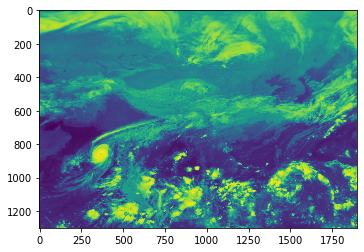

In [14]:
plt.imshow(data)

In [25]:
fname = "./data/C003_20190301001917_FY4A.AWX"

In [26]:
fh = open(fname, 'rb')

In [27]:
ba = bytearray(fh.read())

In [28]:
# define head structure
head_dtype = [
    ('SAT96', 'S12'),    # SAT96 filename
    ('byteSequence', 'i2'),    # integer number byte sequence
    ('firstClassHeadLength', 'i2'),
    ('secondClassHeadLength', 'i2'),
    ('padDataLength', 'i2'),
    ('recordLength', 'i2'),
    ('headRecordNumber', 'i2'),
    ('dataRecordNumber', 'i2'),
    ('productCategory', 'i2'),
    ('compressMethod', 'i2'),
    ('formatString', 'S8'),
    ('qualityFlag', 'i2'),
    ('satelliteName', 'S8'),
    ('year', 'i2'), ('month', 'i2'),
    ('day', 'i2'), ('hour', 'i2'),
    ('minute', 'i2'),
    ('channel', 'i2'),
    ('flagOfProjection', 'i2'),
    ('widthOfImage', 'i2'),
    ('heightOfImage', 'i2'),
    ('scanLineNumberOfImageTopLeft', 'i2'),
    ('pixelNumberOfImageTopLeft', 'i2'),
    ('sampleRatio', 'i2'),
    ('latitudeOfNorth', 'i2'),
    ('latitudeOfSouth', 'i2'),
    ('longitudeOfWest', 'i2'),
    ('longitudeOfEast', 'i2'),
    ('centerLatitudeOfProjection', 'i2'),
    ('centerLongitudeOfProjection', 'i2'),
    ('standardLatitude1', 'i2'),
    ('standardLatitude2', 'i2'),
    ('horizontalResolution', 'i2'),
    ('verticalResolution', 'i2'),
    ('overlapFlagGeoGrid', 'i2'),
    ('overlapValueGeoGrid', 'i2'),
    ('dataLengthOfColorTable', 'i2'),
    ('dataLengthOfCalibration', 'i2'),
    ('dataLengthOfGeolocation', 'i2'),
    ('reserved', 'i2')]

head_info = np.frombuffer(ba[0:104], dtype=head_dtype)

In [29]:
head_info

array([(b'EIEN015C.AWX', 0, 40, 2112, 4849, 7001, 1, 4001, 1, 0, b'SAT2004', 0, b'FY4-008', 2019, 2, 28, 16, 19, 4, 4, 7001, 4001, 0, 0, 1, 5500, 1500, 7000, 14000, 3500, 10500, 0, 0, 5, 5, 0, 255, 0, 2048, 0, 0)],
      dtype=[('SAT96', 'S12'), ('byteSequence', '<i2'), ('firstClassHeadLength', '<i2'), ('secondClassHeadLength', '<i2'), ('padDataLength', '<i2'), ('recordLength', '<i2'), ('headRecordNumber', '<i2'), ('dataRecordNumber', '<i2'), ('productCategory', '<i2'), ('compressMethod', '<i2'), ('formatString', 'S8'), ('qualityFlag', '<i2'), ('satelliteName', 'S8'), ('year', '<i2'), ('month', '<i2'), ('day', '<i2'), ('hour', '<i2'), ('minute', '<i2'), ('channel', '<i2'), ('flagOfProjection', '<i2'), ('widthOfImage', '<i2'), ('heightOfImage', '<i2'), ('scanLineNumberOfImageTopLeft', '<i2'), ('pixelNumberOfImageTopLeft', '<i2'), ('sampleRatio', '<i2'), ('latitudeOfNorth', '<i2'), ('latitudeOfSouth', '<i2'), ('longitudeOfWest', '<i2'), ('longitudeOfEast', '<i2'), ('centerLatitudeOfProje

In [8]:
ind = 104

# head rest information
head_rest_len = (head_info['recordLength'][0].astype(np.int) *
                head_info['headRecordNumber'][0] - ind)
head_rest = np.frombuffer(
    ba[ind:(ind + head_rest_len)],
    dtype='u1', count=head_rest_len)
ind += head_rest_len

# retrieve data records
data_len = (head_info['dataRecordNumber'][0].astype(np.int) *
            head_info['recordLength'][0])
data = np.frombuffer(
    ba[ind:(ind + data_len)], dtype='u1',
    count=data_len)
data.shape = (head_info['dataRecordNumber'][0],
            head_info['recordLength'][0])

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

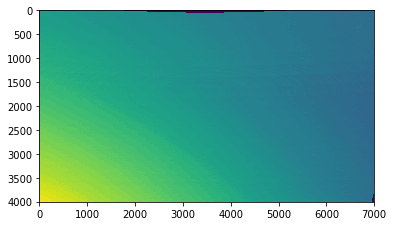

In [10]:
plt.imshow(data)

In [11]:
data.shape

(4001, 7001)

In [12]:
from nmc_met_io.read_satellite import read_awx_cloud

In [23]:
headinfo, data = read_awx_cloud("./data/C003_20190301001917_FY4A.AWX")

In [22]:
def read_awx_cloud(fname):
    """
    Read satellite awx format file.

    :param fname: file pathname.
    :return: data list

    :Example:
    >>> headinfo, data = read_awx_cloud("./data/ANI_IR1_R04_20191026_2100_FY2G.AWX")
    """

    # read part of binary
    # refer to
    # https://stackoverflow.com/questions/14245094/how-to-read-part-of-binary-file-with-numpy

    # open file
    with open(fname, 'rb') as fh:
        # read file content
        ba = bytearray(fh.read())

        # define head structure
        head_dtype = [
            ('SAT96', 'S12'),    # SAT96 filename
            ('byteSequence', 'i2'),    # integer number byte sequence
            ('firstClassHeadLength', 'i2'),
            ('secondClassHeadLength', 'i2'),
            ('padDataLength', 'i2'),
            ('recordLength', 'i2'),
            ('headRecordNumber', 'i2'),
            ('dataRecordNumber', 'i2'),
            ('productCategory', 'i2'),
            ('compressMethod', 'i2'),
            ('formatString', 'S8'),
            ('qualityFlag', 'i2'),
            ('satelliteName', 'S8'),
            ('year', 'i2'), ('month', 'i2'),
            ('day', 'i2'), ('hour', 'i2'),
            ('minute', 'i2'),
            ('channel', 'i2'),
            ('flagOfProjection', 'i2'),
            ('widthOfImage', 'i2'),
            ('heightOfImage', 'i2'),
            ('scanLineNumberOfImageTopLeft', 'i2'),
            ('pixelNumberOfImageTopLeft', 'i2'),
            ('sampleRatio', 'i2'),
            ('latitudeOfNorth', 'i2'),
            ('latitudeOfSouth', 'i2'),
            ('longitudeOfWest', 'i2'),
            ('longitudeOfEast', 'i2'),
            ('centerLatitudeOfProjection', 'i2'),
            ('centerLongitudeOfProjection', 'i2'),
            ('standardLatitude1', 'i2'),
            ('standardLatitude2', 'i2'),
            ('horizontalResolution', 'i2'),
            ('verticalResolution', 'i2'),
            ('overlapFlagGeoGrid', 'i2'),
            ('overlapValueGeoGrid', 'i2'),
            ('dataLengthOfColorTable', 'i2'),
            ('dataLengthOfCalibration', 'i2'),
            ('dataLengthOfGeolocation', 'i2'),
            ('reserved', 'i2')]

        head_info = np.frombuffer(ba[0:104], dtype=head_dtype)
        ind = 104

        # head rest information
        head_rest_len = (head_info['recordLength'][0].astype(np.int) *
                        head_info['headRecordNumber'][0] - ind)
        head_rest = np.frombuffer(
            ba[ind:(ind + head_rest_len)],
            dtype='u1', count=head_rest_len)
        ind += head_rest_len

        # retrieve data records
        data_len = (head_info['dataRecordNumber'][0].astype(np.int) *
                    head_info['recordLength'][0])
        data = np.frombuffer(
            ba[ind:(ind + data_len)], dtype='u1',
            count=data_len)
        data.shape = (head_info['dataRecordNumber'][0],
                    head_info['recordLength'][0])

        # return
        return head_info, data

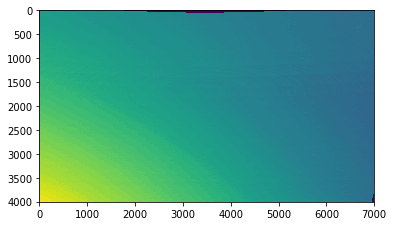

In [24]:
plt.imshow(data)